<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/12_grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grouping

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv" , low_memory=False)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140326 entries, 0 to 140325
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          140326 non-null  int64  
 1   DayOfWeek      140326 non-null  int64  
 2   Date           140326 non-null  object 
 3   Sales          140326 non-null  int64  
 4   Customers      140326 non-null  int64  
 5   Open           140326 non-null  int64  
 6   Promo          140325 non-null  float64
 7   StateHoliday   140325 non-null  object 
 8   SchoolHoliday  140325 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 9.6+ MB


In [8]:
dfg = df.groupby("Store")
dfg

In [13]:
store_avg = dfg.mean()
dfg.mean().head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,4.0,3692.698413,423.365079,0.809524,0.396825,0.134921
2,4.0,4166.373016,485.166667,0.817460,0.396825,0.206349
3,4.0,5838.952381,596.420635,0.809524,0.396825,0.285714
4,4.0,8291.444444,1084.833333,0.817460,0.396825,0.190476
5,4.0,3880.261905,437.039683,0.817460,0.396825,0.182540


In [14]:
dfg.mean().reset_index().head()
store_avg = store_avg.reset_index() 

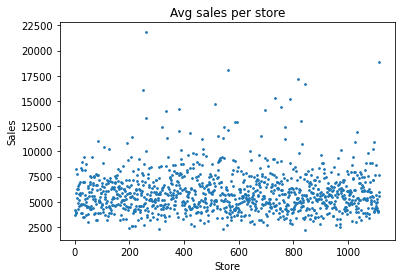

In [17]:
store_avg.plot.scatter("Store", "Sales", s=3, title="Avg sales per store");

## Multiple groups

In [23]:
store_days = df.groupby(["Store", "DayOfWeek"], as_index=False).mean()
store_days.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4451.444444,494.444444,0.888889,0.555556,0.166667
1,1,2,4554.000000,515.277778,1.000000,0.555556,0.166667
2,1,3,4487.166667,518.277778,1.000000,0.555556,0.166667


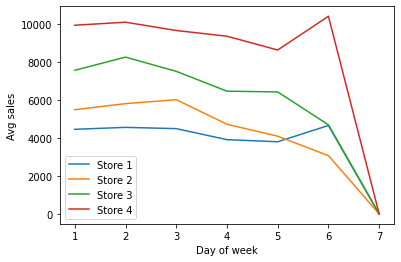

In [31]:
for store in df.Store.unique()[:4]:
  df_tmp = store_days[store_days.Store == store]
  plt.plot(df_tmp.DayOfWeek , df_tmp.Sales , label=f"Store {store}")
plt.xlabel("Day of week")
plt.ylabel("Avg sales")
plt.legend();

# Continuous grouping


In [33]:
df.groupby("Sales").mean().shape

(21734, 6)

In [34]:
# Cut the sales to ranges

In [35]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [37]:
bins = [0, 2000, 4000, 6000, 8000, 10000 ,50000]

In [42]:
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df["SalesGroup"] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [49]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts()
# counting the frequency that any given store and any given day of week fell into a sales group

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: DayOfWeek, Length: 33024, dtype: int64

In [51]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

In [53]:
df.groupby(["Store", "SalesGroup", "DayOfWeek"]).Sales.count()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    1             6
                           2             1
                           3             3
                           4            11
                           5             6
                                        ..
1115   (10000.0, 50000.0]  3             1
                           4             2
                           5             7
                           6             2
                           7             0
Name: Sales, Length: 46830, dtype: int64